In [1]:
%pylab inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [36]:
df = pd.read_pickle('../data/kal_returnsDF.pkl')
symbolsDF = pd.read_pickle('../data/symbolsDF.pkl')
sectors = symbolsDF.sector.unique().tolist()

In [31]:
start, end = '2007-05-02', '2016-04-11'                        #variable here
datadir_name = '_'.join(('data', start, end))
datadir_path = ''.join(('../data/', datadir_name))

def get_symbol_results(symbol='F'):
    df = pd.read_pickle(''.join((datadir_path, '/', symbol, '.pkl')))
    return df
df = get_symbol_results()

In [32]:
prices = df['Adj Close']

In [33]:
np.std((prices - prices.shift(-1))/prices) * np.sqrt(252)

0.48252543544815168

In [34]:
np.std((prices - prices.shift(-5))/prices) * np.sqrt(52)

0.56584466155611601

In [35]:
np.std((prices - prices.shift(-252))/prices) * np.sqrt(1)

1.0474850658271606

In [9]:
prices.head()

Date
2007-05-02    197.556542
2007-05-03    199.419681
2007-05-04    204.622089
2007-05-07    204.514085
2007-05-08    202.470921
Name: Adj Close, dtype: float64

In [10]:
prices.shift(1).head()

Date
2007-05-02           NaN
2007-05-03    197.556542
2007-05-04    199.419681
2007-05-07    204.622089
2007-05-08    204.514085
Name: Adj Close, dtype: float64

Index(['T', 'CTL', 'FTR', 'LVLT', 'VZ', 'APC', 'APA', 'BHI', 'COG', 'CHK', 
       ...
       'ULTA', 'UA', 'URBN', 'VFC', 'VIAB', 'DIS', 'WHR', 'WYN', 'WYNN',
       'YUM'],
      dtype='object', name='symbols', length=504)

In [44]:
pricesDF = pd.DataFrame()
for symbol in symbolsDF.index:
    df = get_symbol_results(symbol)
    pricesDF[symbol] = df['Adj Close']

In [45]:
pricesDF.head()

,T,CTL,FTR,LVLT,VZ,APC,APA,BHI,COG,CHK,...,ULTA,UA,URBN,VFC,VIAB,DIS,WHR,WYN,WYNN,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-02,23.806670,25.751215,6.807884,81.300001,23.579651,42.494249,68.226727,74.189717,9.170394,30.182639,...,NaN,5.74375,25.60,17.145767,36.775298,30.876527,90.793549,31.141156,69.220217,27.672006
2007-05-03,23.942076,26.810619,6.705188,84.299998,24.454959,42.933105,68.815999,74.930171,9.160640,30.640465,...,NaN,5.56250,25.76,17.187508,36.590143,30.867879,90.536753,31.650275,67.008788,27.414899
2007-05-04,24.299052,26.838207,6.713746,83.999999,24.210823,42.923770,69.156675,74.289042,9.167955,30.131764,...,NaN,5.64625,25.43,17.177569,36.431439,31.006261,89.244746,31.226008,66.291044,27.788117
2007-05-07,24.372908,26.909938,6.653840,83.099999,24.312054,43.045152,69.165884,73.774337,9.165517,30.191117,...,NaN,5.60500,25.73,17.255089,37.013354,31.187887,89.758338,31.259951,65.857813,27.663710
2007-05-08,24.169802,26.915455,6.623887,84.750001,24.187005,42.634311,68.521363,73.413147,9.172831,29.919817,...,NaN,5.64000,25.90,17.235212,36.695945,31.611679,90.143535,31.047817,64.603381,27.721766


In [48]:
daily_vol = np.std((pricesDF - pricesDF.shift(-1))/pricesDF) * np.sqrt(252)

In [81]:
daily_vol_2day = np.std((pricesDF - pricesDF.shift(-2))/pricesDF) * np.sqrt(126)

In [64]:
daily_vol_3day= np.std((pricesDF - pricesDF.shift(-3))/pricesDF) * np.sqrt(84)

In [80]:
daily_vol_4day= np.std((pricesDF - pricesDF.shift(-4))/pricesDF) * np.sqrt(63)

In [69]:
daily_vol_5day = np.std((pricesDF - pricesDF.shift(-5))/pricesDF) * np.sqrt(52)

In [90]:
daily_vol_6day = np.std((pricesDF - pricesDF.shift(-6))/pricesDF) * np.sqrt(42)

In [93]:
def get_xday_vol(pricesDF, x):
    vol = np.std((pricesDF - pricesDF.shift(-x))/pricesDF) * np.sqrt(252/x)
    return vol

In [95]:
def get_vol_ratio(pricesDF, x, y):
    return get_xday_vol(pricesDF, x)/get_xday_vol(pricesDF, y)

/Users/liamconnell/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


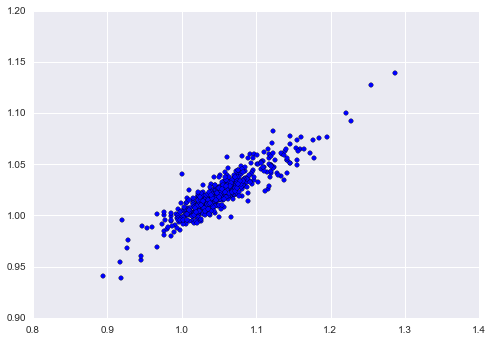

In [137]:
plt.scatter(get_vol_ratio(pricesDF, 3, 8), get_vol_ratio(pricesDF, 3, 5) )

In [91]:
(daily_vol/ daily_vol_6day).mean()

1.0820505199773238

In [ ]:
## (daily_vol/ daily_vol_5day).hist(bins=50)

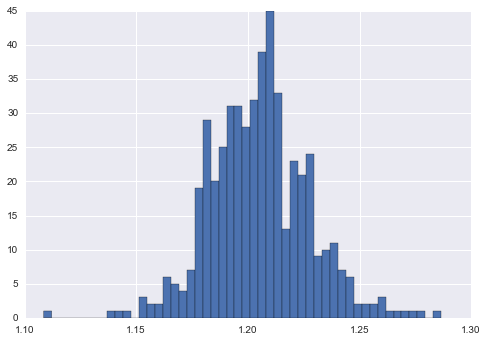

In [66]:
(daily_vol_2day/ daily_vol_3day).hist(bins=50)